In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
G = 6.67430e-11  # Gravitational constant in N*m^2/kg^2
M_sun = 1.989e30  # Solar mass in kg
R_sun = 6.955e10  # Solar radius in m
K_NR = 1.2435e15  # Constant for non-relativistic electron degenerate gas (cgs units)
m_e = 9.11e-31
hbar = 1.05457182e-34
c = 2.99e8
a_z = 2
m_n = 1.67e-27


# ------------------ EOS Module -------------------
def eos_non_relativistic(rho):
    """Non-relativistic degenerate electron gas EOS"""
    return K_NR * rho**(5/3)

def rho_from_pressure_non_relativistic(P):
    """Inverse EOS to get density from pressure for non-relativistic case"""
    K_NR = (hbar**2  * (3 * np.pi**2 / (a_z * m_n * c**2))**5/3) / (15 * np.pi**2 * m_e)
    return (P / K_NR)**(3/5)


# K_R = (hbar*c  * (3 * np.pi**2 / (a_z * m_n * c**2))**5/3) / (12 * np.pi**2)

# ----------------- Structure Solver -----------------
def hydrostatic_equilibrium(r, y):
    """Equation for hydrostatic equilibrium: y[0]=Pressure, y[1]=Mass"""
    P, M = y
    rho = rho_from_pressure_non_relativistic(P)  # Calculate density from pressure

    
    if rho == 0 or P <= 0:
        return [0, 0]  # Stop if pressure or density is zero

    dP_dr = -G * M * rho / r**2
    dM_dr = 4 * np.pi * r**2 * rho
    return [dP_dr, dM_dr]

# ----------------- Event to Stop at Pressure < threshold -----------------
def stop_at_pressure_threshold(r, y):
    threshold_pressure = 1e-10  # Define a small threshold for pressure
    return y[0] - threshold_pressure  # Stop when pressure y[0] < threshold_pressure

# ----------------- Main Integration Function -----------------
def integrate_star(central_pressure):
    """Solve the structure equations numerically"""
    radius = 1e11
    
    sol = solve_ivp(hydrostatic_equilibrium, [1e-6, radius], [central_pressure, 0], 
                    events=stop_at_pressure_threshold, dense_output=True, max_step=1e7)
    
    return sol.t, sol.y[0], sol.y[1]  # Return radius, pressure, and mass profiles


In [123]:
p = 10e20
radius, pressure, mass = integrate_star(p)

print(pressure)
print(pressure[0])

# Extract the final radius and mass when pressure drops to (near) zero
final_radius = radius[-1] / R_sun  # Convert to solar radii
final_mass = mass[-1] / M_sun  # Convert to solar masses

print(final_radius,final_mass)

[1.00000000e+21 1.00000000e+21 1.00000000e+21 ... 2.21807663e+18
 2.21609030e+18 2.21434189e+18]
1e+21
1.4378145219266714 17027935.094957814


2.2143418884047808e+18


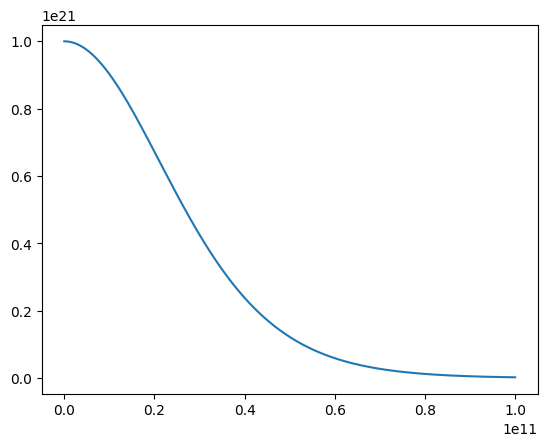

In [125]:
plt.plot(radius,pressure)
print(min(pressure))

In [89]:

# -------------------- Main Program --------------------
if __name__ == '__main__':
    # Define the central pressure of the star (in dyne/cm^2)
    p_range = np.logspace(10e20, 10e25, 5)
    radii = []
    masses = []
    for p in p_range:
        radius, pressure, mass = integrate_star(p)

        # Extract the final radius and mass when pressure drops to (near) zero
        final_radius = radius[-1] / R_sun  # Convert to solar radii
        final_mass = mass[-1] / M_sun  # Convert to solar masses

        radii.append(final_radius)
        masses.append(final_mass)


plt.plot(radii,masses)

    

    



C:\Users\Lenovo ThinkPad\AppData\Local\Temp\ipykernel_6016\3832965253.py:39: RuntimeWarning: invalid value encountered in scalar multiply
  dP_dr = -G * M * rho / r**2


KeyboardInterrupt: 

In [76]:
def rho_from_pressure_non_relativistic(P):
    """Inverse EOS to get density from pressure for non-relativistic case"""
    K_NR = hbar * c / (15 * np.pi**2) * (3 * np.pi**2 / (a_z * m_n * c**2))**5/3
    return (P / K_NR)**(3/5)



print(K_NR)

1243500000000000.0
